# Training and Tuning a Multilayer Perceptron

**Your task is to use this existing code, write your code where it is required and change it where it is allowed to achieve a better performance on the dataset provided.**

---
<font color='darkred'>
For the successfull outcome of this homework:
    
- Answer the questions at the bottom of this notebook
</font>
---

**NOTE: You need to obtain the dataset from the following link: https://drive.google.com/open?id=1qY_3MofKj4vWk2wcQMN4kHoRXSNOuYY5** Download this .zip archive and place it into the same directory as your Jupyter Notebook and the .csv files (train.csv, test.csv, valid.csv). Then unzip it.

---

Feel free to make any changes to the architecture, i.e., you can

- change the number of layers
- change the activation function(s) (logistic sigmoid, tanh, relu, leaky relu, ...)
- change the learning rate
- change the number of hidden layers
- change the number of units in the hidden layer(s)
- change the number of epochs
- change the minibatch size
- change the weight initialization
- change the optimization algorithm (if you think it can help)
- add batch norm
- add regularization
- add data augmentation

However,

- don't change the random seed
- don't use transfer learning
- don't use external architectures
- don't use other types of neural network types (eg. Convolutional)

In [52]:
import torch
import os
import pandas as pd
import numpy as np
import time
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# No need to change anything here!

RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Loading the Dataset

The dataset consists of 3 classes:
- Drawings of "birds" (class 0)
- Drawings of "pizzas" (class 1)
- Drawings of "screwdrivers" (class 2)

In [5]:
df_train = pd.read_csv('train.csv')
print('Class distribution Train', np.bincount(df_train['Class Label'].values))

Class distribution Train [8005 7669 6826]


The images are 28x28 dimensional (grayscale).

Some examples:

png-files/bird_000043.png


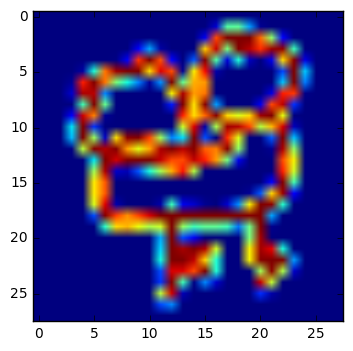

png-files/bird_000107.png


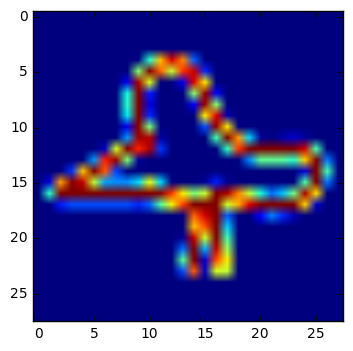

png-files/pizza_000000.png


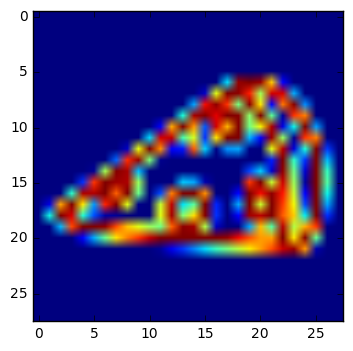

png-files/pizza_000002.png


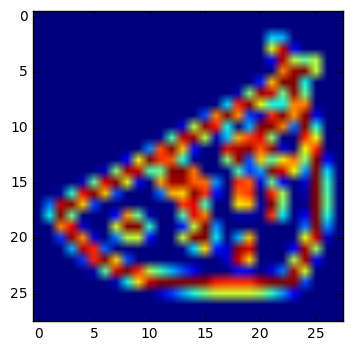

png-files/screwdriver_000001.png


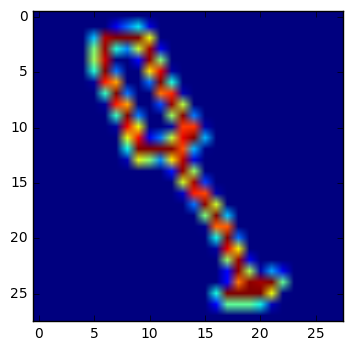

png-files/screwdriver_000012.png


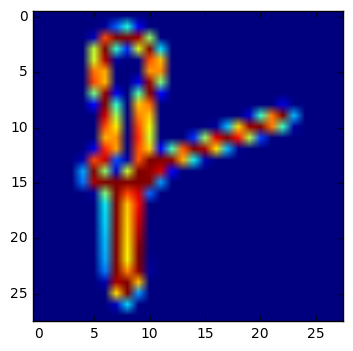

In [6]:
import glob
image_paths = sorted(glob.glob('png-files/*.png'))
for i in (12, 25, 30000, 30001, 60000, 60005):
    im_path = image_paths[i]
    print(im_path)
    im = Image.open(im_path)
    plt.imshow(im)
    plt.show()

When working on machine learning problems you need to deal with different types of datasets. Some datasets may be images grouped into folders, others can be audio files that have their annotations in apropriate csv files, or you may have a stream of upcoming data and etc. PyTorch provides a convenient way to deal with all these cases by leveraging Dataset and DataLoader classes. They provide a common interface to iterate over the items of your data. Basically what you need to do is implementing the Dataset class which describes the way items in your dataset can be indexed and then use a DataLoader class that provides an iterable over your given dataset. PyTorch will use this class to optimally execute it on different cores of your GPU and take care of all details so that you don't need to implement this on your own. You can learn in more details this [here](https://pytorch.org/docs/stable/data.html) and read [this tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html). For some common cases you may use a predefined classes that extend the above mentioned.(e.g. [VisionDataset](https://pytorch.org/docs/stable/torchvision/datasets.html)). Note: for this assignment you need to implement your own.

In [99]:
class QuickdrawDataset(Dataset):

    def __init__(self, csv_path, img_dir, transform=None):
    
        df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.img_names = df['Filename'].values
        self.y = df['Class Label'].values
        self.transform = transform

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        img_name = self.img_names[index]
        img = df["Filename"][img_name]
        label = self.y[index]
        print(img)
        print(label)
        return img, label

    def __len__(self):
        length = len(self.img_names)
        return length

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x12e506a20>>
Traceback (most recent call last):
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 909, in _shutdown_workers
    q.close()
  File "/Users/sanzhar/anaconda/lib/python3.5/multiprocessing/queues.py", line 134, in close
    self._reader.close()
  File "/Users/sanzhar/anaconda/lib/python3.5/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/Users/sanzhar/anaconda/lib/python3.5/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingData

In [100]:
# Note that transforms.ToTensor()
# already divides pixels by 255. internally

custom_transform = transforms.Compose([#transforms.Lambda(lambda x: x/255.),
                                       transforms.ToTensor()])


train_dataset = QuickdrawDataset(csv_path='train.csv',
                                 img_dir='png-files/',
                                 transform=custom_transform)
train_dataset.__getitem__(0)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=128, #### CHANGE IF YOU LIKE
                          shuffle=True,
                          num_workers=4)

NameError: name 'df' is not defined

Initialize validation and test sets accordingly using the code above

Bellow you need to visualize some random items from your dataset. This is a usual practice to make sure that your Dataset and Dataloader instances work fine.

In [83]:
train_dataset = QuickdrawDataset(csv_path='train.csv',
                                 img_dir='png-files/',
                                 transform=custom_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=128, #### CHANGE IF YOU LIKE
                          shuffle=True,
                          num_workers=4)
# Saved for me :)
#valid_dataset = # Your code goes here

#valid_loader = # Your code goes here

#test_dataset = # Your code goes here

#test_loader = # Your code goes here

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



22500
Traceback (most recent call last):
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-f87e6648e342>", line 11, in <module>
    valid_dataset, test_dataset = train_loader.dataset[split:], train_loader.dataset[:split]
  File "<ipython-input-7-ea111cef2d39>", line 16, in __getitem__
    self.img_names[index])
  File "/Users/sanzhar/anaconda/lib/python3.5/posixpath.py", line 89, in join
    genericpath._check_arg_types('join', a, *p)
  File "/Users/sanzhar/anaconda/lib/python3.5/genericpath.py", line 143, in _check_arg_types
    (funcname, s.__class__.__name__)) from None
TypeError: join() argument must be str or bytes, not 'ndarray'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 1821

TypeError: join() argument must be str or bytes, not 'ndarray'

In [81]:
#####################
# Your code goes here
#####################
print(valid_dataset)

[4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 466

If you get an error, make sure the `png-files` folder is unzipped and it the same directory as this notebook!

# Multilayer Perceptron Model

The cell below contains the multi-layer perceptron model. This is the main section where you want to make changes to the architecture.

In [74]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden_1,num_classes):
        super(MLP, self).__init__()
        
        self.num_classes = num_classes
        
        ### ADD ADDITIONAL LAYERS BELOW IF YOU LIKE
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
        
    def forward(self, x):
        
        ### MAKE SURE YOU CONNECT THE LAYERS PROPERLY IF YOU CHANGED
        ### ANYTHNG IN THE __init__ METHOD ABOVE
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        
        logits = self.linear_out(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas

    
#################################
### Model Initialization
#################################


# the random seed makes sure that the random weight initialization
# in the model is always the same.
# In practice, some weights don't work well, and we may also want
# to try different random seeds. In this homework, this is not
# necessary.
torch.manual_seed(RANDOM_SEED)

### IF YOU CHANGED THE ARCHITECTURE ABOVE, MAKE SURE YOU 
### ACCOUNT FOR IT VIA THE PARAMETERS BELOW. I.e., if you
### added a second hidden layer, you may want to add a
### hidden_2 parameter here. Also you may want to play
### with the number of hidden units.
model = MLP(num_features=28*28,
            num_hidden_1=50,
            num_classes=3)

model = model.to(DEVICE)

### You may try different optimizers
### Also you can try different values of learning rates as well as try some advanced methods to find
### optimal value range (eg. read this amazing paper https://arxiv.org/abs/1506.01186 and it's implementation
### on PyTorch https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.CyclicLR)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [77]:
#################################
### Training
#################################


################################################
# PLEASE DON'T CHANGE THE compute_epoch_loss
# and the compute accuracy functions
###############################################

def compute_epoch_loss(model, data_loader):
    curr_loss, num_examples = 0., 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            logits, probas = model(features)
            loss = F.cross_entropy(logits, targets, reduction='sum')
            num_examples += targets.size(0)
            curr_loss += loss

        curr_loss = curr_loss / num_examples
        return curr_loss


def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            logits, probas = model.forward(features)
            predicted_labels = torch.argmax(probas, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    


start_time = time.time()
minibatch_cost = []
epoch_cost = []

#################################################################
### YOU CAN CHANGE THE NUMBER OF EPOCHS IF YOU LIKE
#################################################################

NUM_EPOCHS = 2 # Please feel free to change

for epoch in range(NUM_EPOCHS):
    print(epoch)
    print("START TRAIN")
    model.train()
    print("END TRAIN")
    print("Train loader")
    print(train_loader)
    for batch_idx, (features, targets) in enumerate(train_loader):
        print("features")
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
        print("FORWARD AND BACK PROP")
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()

        cost.backward()
        minibatch_cost.append(cost)
        print("UPDATE MODEL PARAMETERS")
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        print("LOGGING")
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, NUM_EPOCHS, batch_idx, 
                     len(train_loader), cost))
    print("END DOUBLE LOOP")
    model.eval()
    cost = compute_epoch_loss(model, train_loader)
    epoch_cost.append(cost)
    
    train_accuracy = compute_accuracy(model, train_loader)
    valid_accuracy = compute_accuracy(model, valid_loader)
    
    print('Epoch: %03d/%03d Train Cost: %.4f' % (
            epoch+1, NUM_EPOCHS, cost))
    print('Train Accuracy: %.3f | Validation Accuracy: %.3f' % (train_accuracy, valid_accuracy))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



0
START TRAIN
END TRAIN
Train loader
The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.
Traceback (most recent call last):
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-b8440dd07e79>", line 57, in <module>
    for batch_idx, (features, targets) in enumerate(train_loader):
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 278, in __iter__
    return _MultiProcessingDataLoaderIter(self)
  File "/Users/sanzhar/anaconda/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 647, in __init__
    self._worker_result_queue = multiprocessing_context.Queue()
  File "/Users/sanzhar/anaconda/lib/python3.5/multiprocessing/context.py", line 101, in Queue
    return Queue(maxsize, ctx=self.get_cont

OSError: [Errno 24] Too many open files

# Evaluation (No Need To Change Any Code in This Section!)

[]


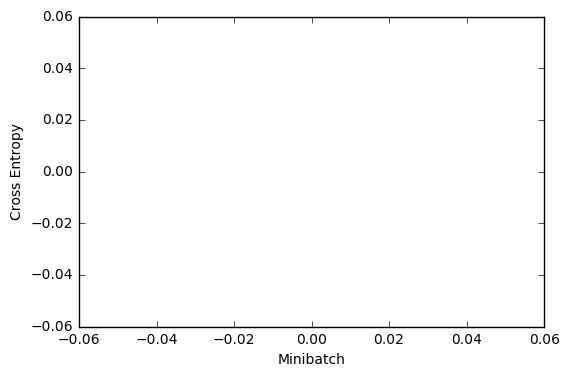

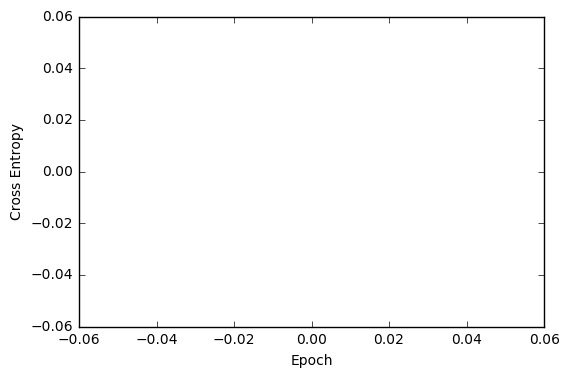

In [51]:
print(minibatch_cost)
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('Cross Entropy')
plt.xlabel('Minibatch')
plt.show()

plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()

1


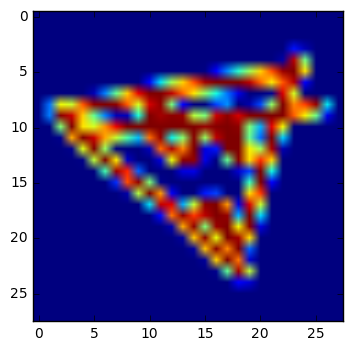

2


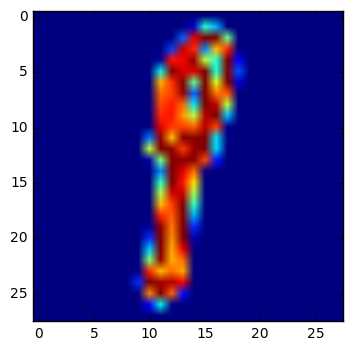

0


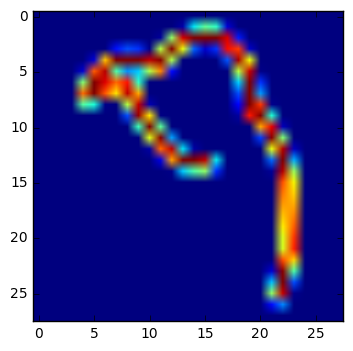

1


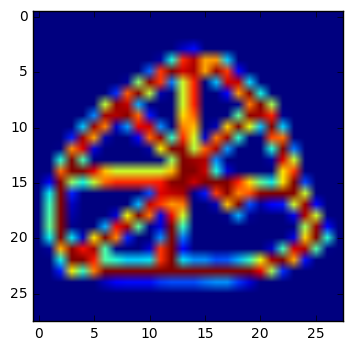

1


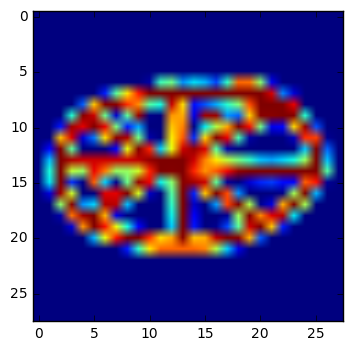

2


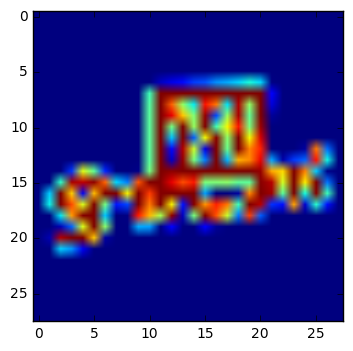

0


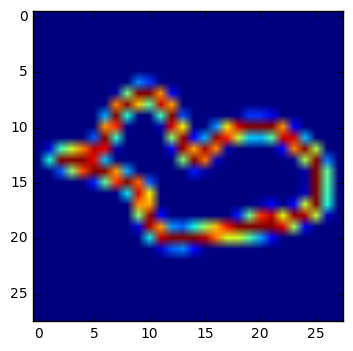

2


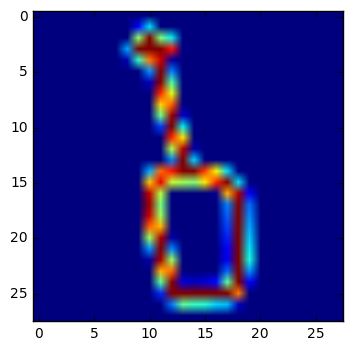

1


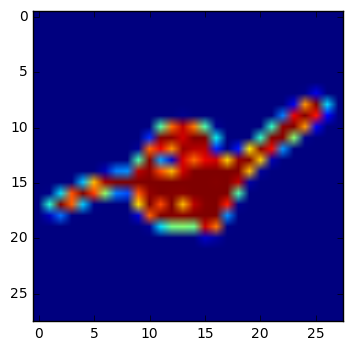

2


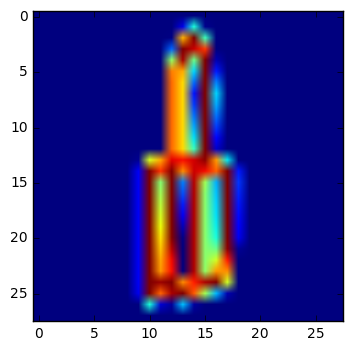

1


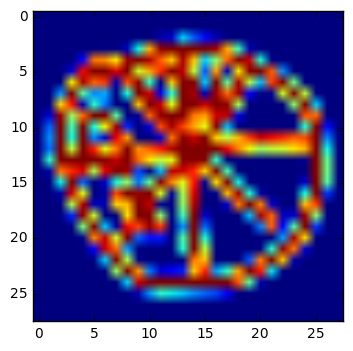

0


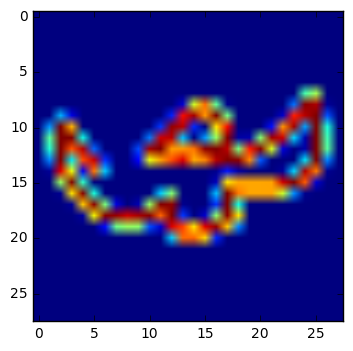

1


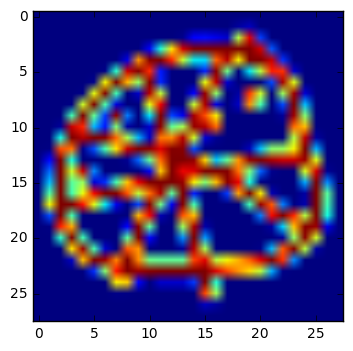

0


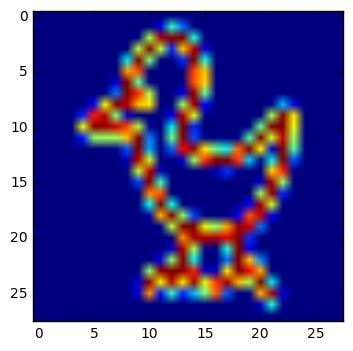

2


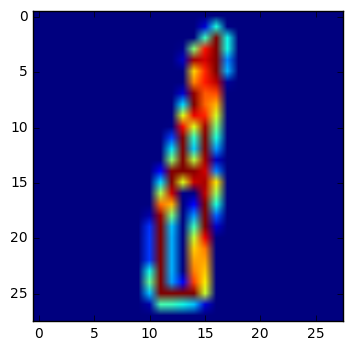

1


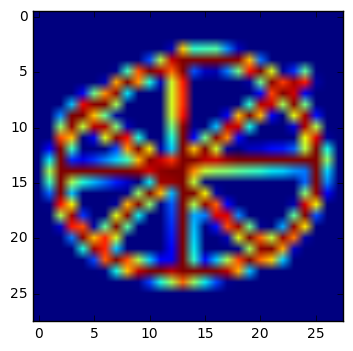

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.PngImagePlugin.PngImageFile'>

In [40]:
print('Test Accuracy: %.2f' % compute_accuracy(model, test_loader))

# Conclusions (YOUR ANSWERS REQUIRED)

**1) What is your training, validation, and test accuracy (paste your numbers from above)? Also, do you notice any overfitting? If yes, why do you think your model is overfitting, and what would be a simple technique to reduce overfitting?**

[Your answers here]

**2) What architectual changes did you make to improve the performance?**

[Briefly list the changes here and explain why do you think they helped]

In [ ]:
#SPLITDATASET

batch_size = 128
validation_split = .2
shuffle_dataset = False
random_seed= 42

dataset_size = len(train_loader.dataset)
indices = list(range(dataset_size))

split = int(np.floor(validation_split * dataset_size))

valid_dataset, test_dataset = train_loader.dataset[split:], train_loader.dataset[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(valid_dataset)
valid_sampler = SubsetRandomSampler(test_dataset)

valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          sampler=valid_sampler)